In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
kaggle_df = pd.read_csv("/content/drive/MyDrive/AML/Final project/kaggle_dataset.csv")
kaggle_df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [4]:
# Dropping all unwanted columns

kaggle_df = kaggle_df[["url","ip","length_url","shortening_service","nb_at","nb_dslash","prefix_suffix","http_in_path","nb_slash","dns_record",
                       "whois_registered_domain","domain_age","page_rank","status"]]
kaggle_df.head()

,url,ip,length_url,shortening_service,nb_at,nb_dslash,prefix_suffix,http_in_path,nb_slash,dns_record,whois_registered_domain,domain_age,page_rank,status
0,http://www.crestonwood.com/router.php,0,37,0,0,0,0,0,3,1,0,-1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,1,77,0,0,0,0,0,5,0,0,5767,2,phishing
2,https://support-appleld.com.secureupdate.duila...,1,126,0,0,0,1,0,5,0,0,4004,0,phishing
3,http://rgipt.ac.in,0,18,0,0,0,0,0,2,0,0,-1,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,0,55,0,0,0,0,0,5,0,0,8175,6,legitimate


In [5]:
kaggle_df.describe()

,ip,length_url,shortening_service,nb_at,nb_dslash,prefix_suffix,http_in_path,nb_slash,dns_record,whois_registered_domain,domain_age,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000
mean,0.150569,61.126684,0.123447,0.022222,0.006562,0.202450,0.016710,4.289589,0.020122,0.072878,4062.543745,3.185739
std,0.357644,55.297318,0.328964,0.155500,0.080742,0.401843,0.169358,1.882251,0.140425,0.259948,3107.784600,2.536955
min,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,-12.000000,0.000000
25%,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,972.250000,1.000000
50%,0.000000,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,3993.000000,3.000000
75%,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,7026.750000,5.000000
max,1.000000,1641.000000,1.000000,4.000000,1.000000,1.000000,4.000000,33.000000,1.000000,1.000000,12874.000000,10.000000


In [6]:
# Few Column Transformations to align it with our extracted dataset

kaggle_df["nb_at"] = (kaggle_df["nb_at"] > 0).astype(int)
kaggle_df["http_in_path"] = (kaggle_df["http_in_path"] > 0).astype(int)

kaggle_df.describe()

,ip,length_url,shortening_service,nb_at,nb_dslash,prefix_suffix,http_in_path,nb_slash,dns_record,whois_registered_domain,domain_age,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000
mean,0.150569,61.126684,0.123447,0.021435,0.006562,0.202450,0.013123,4.289589,0.020122,0.072878,4062.543745,3.185739
std,0.357644,55.297318,0.328964,0.144835,0.080742,0.401843,0.113808,1.882251,0.140425,0.259948,3107.784600,2.536955
min,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,-12.000000,0.000000
25%,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,972.250000,1.000000
50%,0.000000,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,3993.000000,3.000000
75%,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,7026.750000,5.000000
max,1.000000,1641.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,1.000000,12874.000000,10.000000


In [7]:
# Encoding the status columns to binary format

from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
kaggle_df['status'] = label_encoder.fit_transform(kaggle_df['status'])
kaggle_df.head()

,url,ip,length_url,shortening_service,nb_at,nb_dslash,prefix_suffix,http_in_path,nb_slash,dns_record,whois_registered_domain,domain_age,page_rank,status
0,http://www.crestonwood.com/router.php,0,37,0,0,0,0,0,3,1,0,-1,4,0
1,http://shadetreetechnology.com/V4/validation/a...,1,77,0,0,0,0,0,5,0,0,5767,2,1
2,https://support-appleld.com.secureupdate.duila...,1,126,0,0,0,1,0,5,0,0,4004,0,1
3,http://rgipt.ac.in,0,18,0,0,0,0,0,2,0,0,-1,3,0
4,http://www.iracing.com/tracks/gateway-motorspo...,0,55,0,0,0,0,0,5,0,0,8175,6,0


In [8]:
# Loading extracted datasets

phishing_extracted = pd.read_csv("/content/drive/MyDrive/AML/Final project/phishing_extracted_raw.csv")
phishing_extracted.head()

,Input_URL,Have_IP,URL_Length,TinyURL,Have_At,Redirection,Prefix/Suffix,https_Domain,URL_Depth,DNS_Record,Whois_Registered,Domain_Age,Page_Rank,status
0,https://uspszbpr.top/,0,21,0,0,0,0,0,3,1,0,20,0,1
1,https://new.express.adobe.com/webpage/6JQdVe9y...,0,51,0,0,0,0,0,4,0,0,13909,6,1
2,https://ohigfdgfdzsfxhghb.weebly.com/,0,37,0,0,0,0,0,3,1,0,6837,0,1
3,https://files-pdf-73j.pages.dev/?e=x,0,36,0,0,0,1,0,3,0,-1,-2,0,1
4,https://bit.ly/40bj0PJ,0,22,1,0,0,0,0,3,0,0,6056,9,1


In [9]:
phishing_extracted.shape

(7000, 14)

In [10]:
legit_extracted = pd.read_csv("/content/drive/MyDrive/AML/Final project/legit_extracted_raw.csv")
legit_extracted.head()

,Input_URL,Have_IP,URL_Length,TinyURL,Have_At,Redirection,Prefix/Suffix,https_Domain,URL_Depth,DNS_Record,Whois_Registered,Domain_Age,Page_Rank,status
0,http://codecanyon.net/search?date=this-month&l...,0,136,0,0,0,0,0,3,0,0,5527,6,0
1,http://caixa.gov.br/empresa/credito-financiame...,0,92,0,0,0,0,0,6,0,0,9980,5,0
2,http://olx.ua/uk/list/q-%D0%B4%D0%B6%D0%B8%D0%...,0,107,0,0,0,0,0,6,0,0,-2,5,0
3,http://elitedaily.com/wp-content/themes/strang...,0,83,0,0,0,0,0,7,0,0,4856,6,0
4,http://metro.co.uk/2014/10/10/is-big-brother-f...,0,125,0,0,0,0,0,7,0,0,10364,6,0


In [11]:
legit_extracted.shape

(7000, 14)

In [12]:
extracted_df = pd.concat([legit_extracted, phishing_extracted], axis=0, ignore_index=True)
extracted_df

,Input_URL,Have_IP,URL_Length,TinyURL,Have_At,Redirection,Prefix/Suffix,https_Domain,URL_Depth,DNS_Record,Whois_Registered,Domain_Age,Page_Rank,status
0,http://codecanyon.net/search?date=this-month&l...,0,136,0,0,0,0,0,3,0,0,5527,6,0
1,http://caixa.gov.br/empresa/credito-financiame...,0,92,0,0,0,0,0,6,0,0,9980,5,0
2,http://olx.ua/uk/list/q-%D0%B4%D0%B6%D0%B8%D0%...,0,107,0,0,0,0,0,6,0,0,-2,5,0
3,http://elitedaily.com/wp-content/themes/strang...,0,83,0,0,0,0,0,7,0,0,4856,6,0
4,http://metro.co.uk/2014/10/10/is-big-brother-f...,0,125,0,0,0,0,0,7,0,0,10364,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,https://bit.ly/4fvy5Tw,0,22,1,0,0,0,0,3,0,0,6056,9,1
13996,https://caregouhabekoulaseme.freewebhostmost.c...,0,91,1,0,0,0,0,6,0,0,379,0,1
13997,https://qrco.de/bfDCVV,0,22,0,0,0,0,0,3,0,0,-2,6,1
13998,https://itrustcapital-logis-access.webflow.io/,0,46,0,0,0,1,0,3,1,0,4240,0,1


In [13]:
extracted_df.describe()

,Have_IP,URL_Length,TinyURL,Have_At,Redirection,Prefix/Suffix,https_Domain,URL_Depth,DNS_Record,Whois_Registered,Domain_Age,Page_Rank,status
count,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000
mean,0.004571,85.344929,0.089286,0.007143,0.011786,0.156357,0.029071,4.638000,0.361000,-0.176143,4698.614000,3.899714,0.500000
std,0.067460,71.240318,0.285166,0.084216,0.107924,0.363207,0.168013,2.064005,0.480308,0.381705,3954.281626,3.072977,0.500018
min,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,-1.000000,-2.000000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,23.000000,0.000000,0.000000
50%,0.000000,87.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,4980.000000,5.000000,0.500000
75%,0.000000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,8107.000000,6.000000,1.000000
max,1.000000,3654.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,1.000000,13909.000000,10.000000,1.000000


In [14]:
# Dropping/Transforming rows in our extracted data where Whois_Registered == -1 based on status(=legit/phish)

extracted_df = extracted_df[~((extracted_df['Whois_Registered'] == -1) & (extracted_df['status'] == 0))]
extracted_df.loc[(extracted_df['Whois_Registered'] == -1) & (extracted_df['status'] == 1), 'Whois_Registered'] = 1

extracted_df["Whois_Registered"].value_counts()

,count
Whois_Registered,
0,11526
1,1791


In [15]:
# Exclude rows where domain_age is -1 or -2 and status is legit and set the domain age_value to 0 if status is phishing

extracted_df = extracted_df[~((extracted_df['Domain_Age'].isin([-1, -2])) & (extracted_df['status'] == 0))]
extracted_df.loc[(extracted_df['Domain_Age'].isin([-1, -2])) & (extracted_df['status'] == 1), 'Domain_Age'] = 0


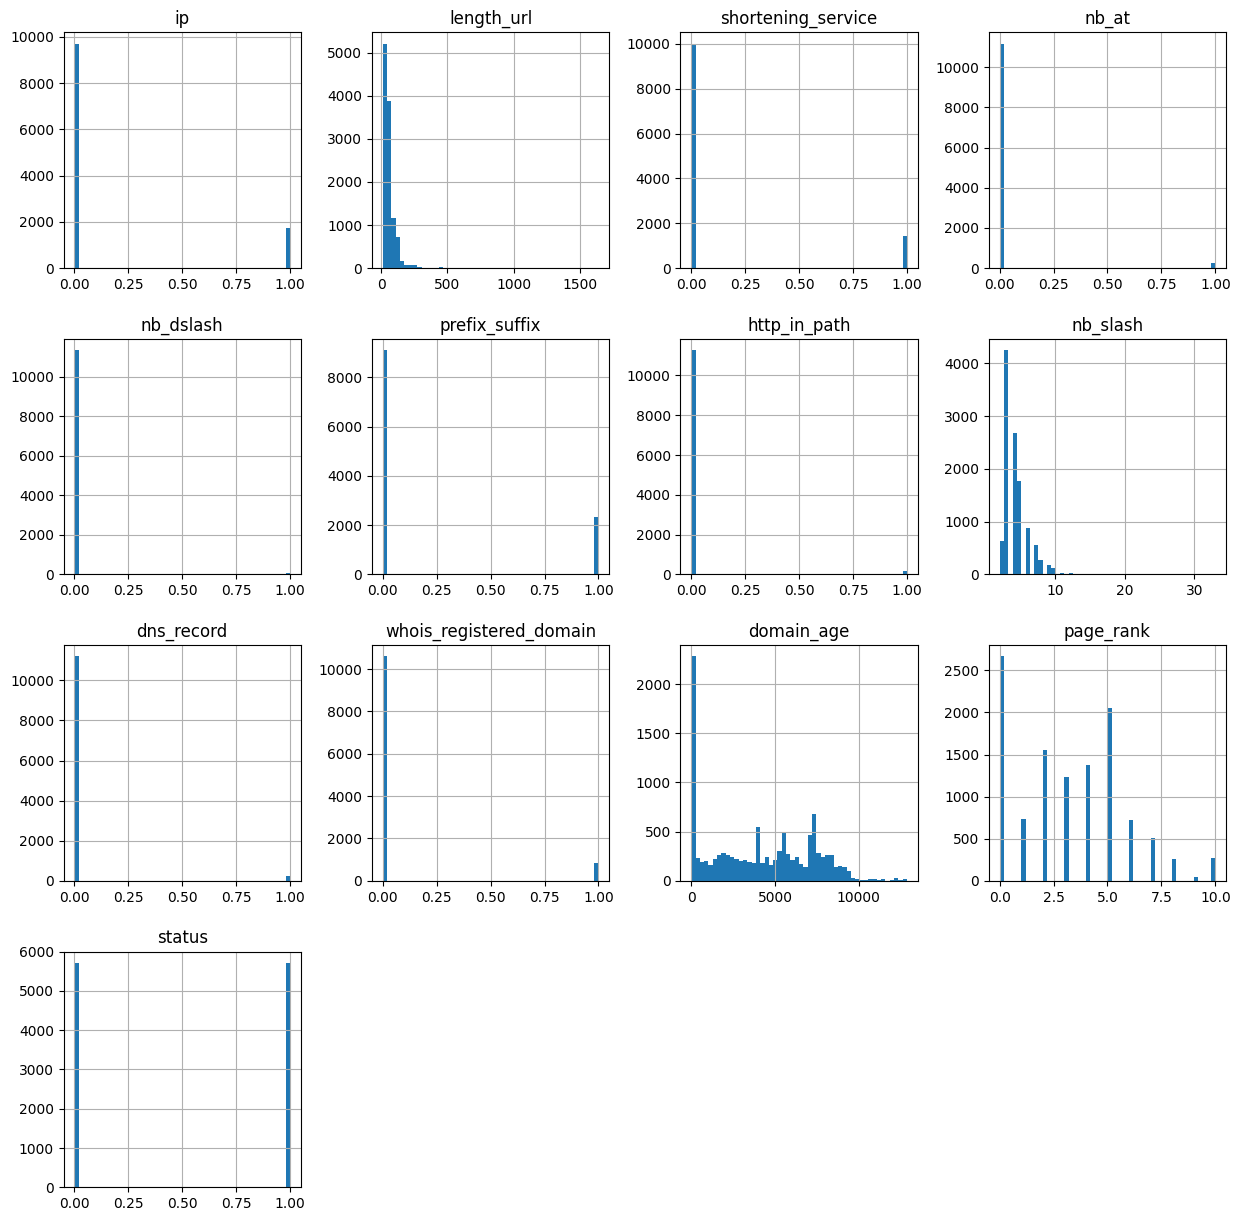

In [16]:
# Visualizing both datasets

import matplotlib.pyplot as plt

kaggle_df.hist(bins = 50,figsize = (15,15))
plt.show()

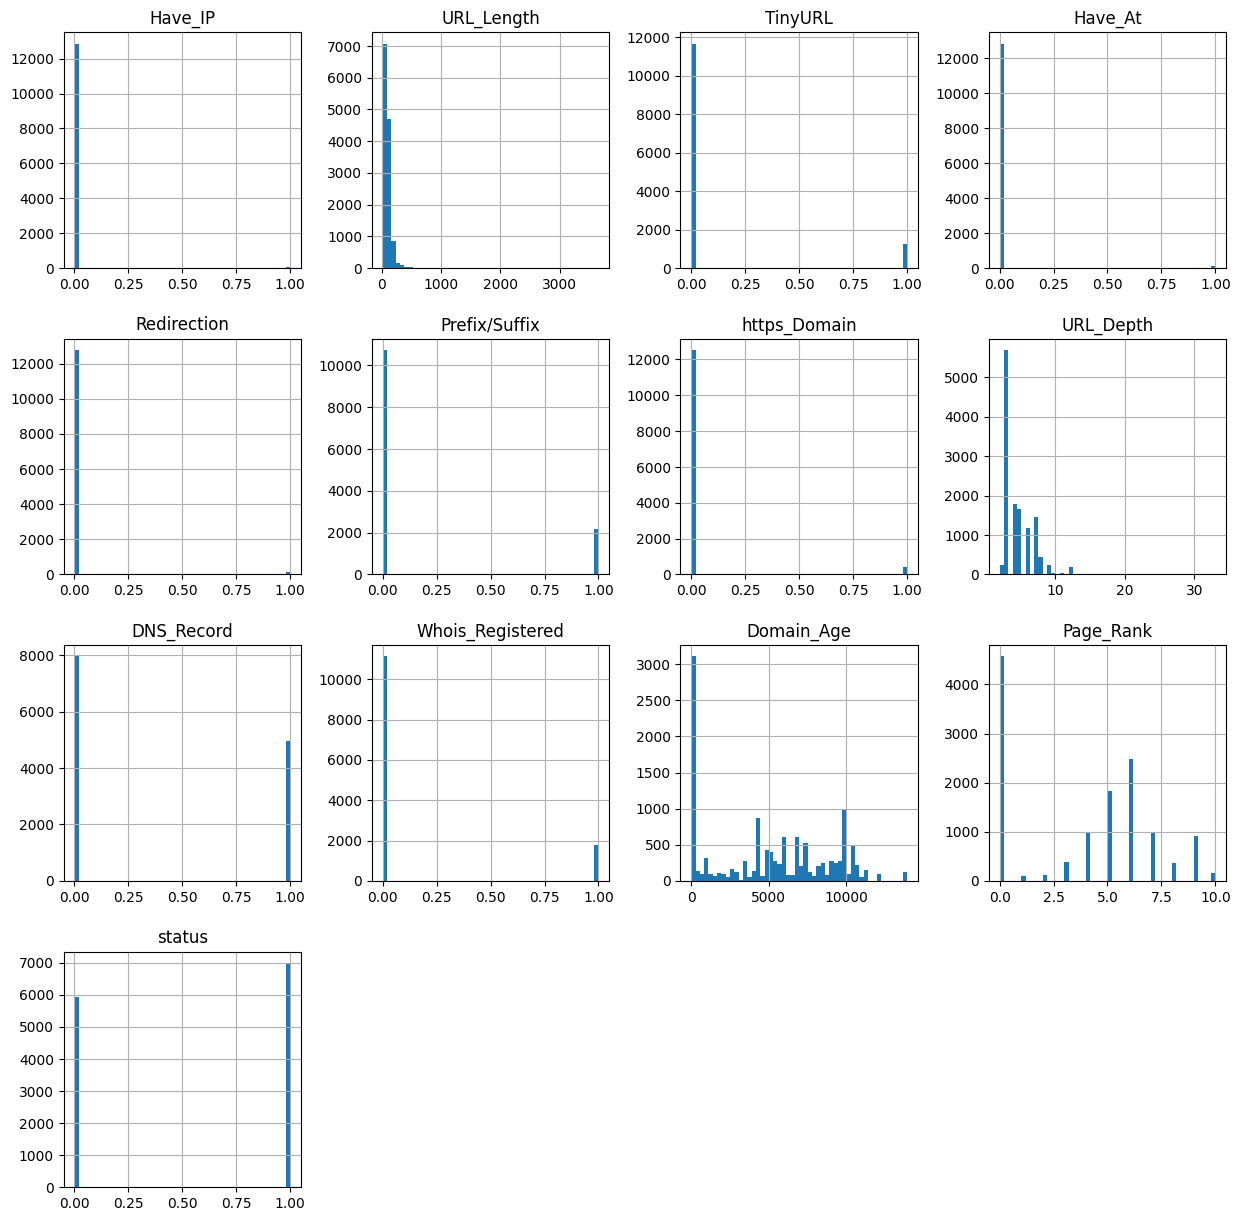

In [17]:
extracted_df.hist(bins = 50,figsize = (15,15))
plt.show()

In [18]:
# Combining the datasets

extracted_df.columns = kaggle_df.columns

combined_df = pd.concat([kaggle_df, extracted_df], axis=0, ignore_index=True)
combined_df.shape


(24361, 14)

In [19]:
# Splitting into X and y and training and test sets for our combined dataset

from sklearn.model_selection import train_test_split

y = kaggle_df['status']
X = kaggle_df.drop(columns=['url','status'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Training and testing performance of different models with the kagglen dataset and it combined with our extracted dataset

### Logistic Regression

In [20]:
# Scaling


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression

LogisticRegression = LogisticRegression(random_state=42)
LogisticRegression.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [22]:
y_pred = LogisticRegression.predict(X_test_scaled)
y_pred_train = LogisticRegression.predict(X_train_scaled)

In [23]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)
report = classification_report(y_test, y_pred)

models_result = {}
models_result['Logistic Regression'] = [accuracy_train, accuracy_test]

print("Logistic Regression Metrics:")
print("Accuracy on training Data: {:.3f}".format(accuracy_train))
print("Accuracy on test Data: {:.3f}".format(accuracy_test))
print("Classification Report:\n", report)

Logistic Regression Metrics:
Accuracy on training Data: 0.815
Accuracy on test Data: 0.820
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83      1157
           1       0.83      0.80      0.81      1129

    accuracy                           0.82      2286
   macro avg       0.82      0.82      0.82      2286
weighted avg       0.82      0.82      0.82      2286



### Decision Tree Model

In [24]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10, random_state=42)
tree.fit(X_train_scaled, y_train)


DecisionTreeClassifier(max_depth=10, random_state=42)

In [25]:
y_pred = tree.predict(X_test_scaled)
y_pred_train = tree.predict(X_train_scaled)


In [26]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)
report = classification_report(y_test, y_pred)

models_result['Decision Tree'] = [accuracy_train, accuracy_test]

print("Decision Tree Metrics:")
print("Accuracy on training Data: {:.3f}".format(accuracy_train))
print("Accuracy on test Data: {:.3f}".format(accuracy_test))
print("Classification Report:\n", report)

Decision Tree Metrics:
Accuracy on training Data: 0.923
Accuracy on test Data: 0.893
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89      1157
           1       0.89      0.90      0.89      1129

    accuracy                           0.89      2286
   macro avg       0.89      0.89      0.89      2286
weighted avg       0.89      0.89      0.89      2286



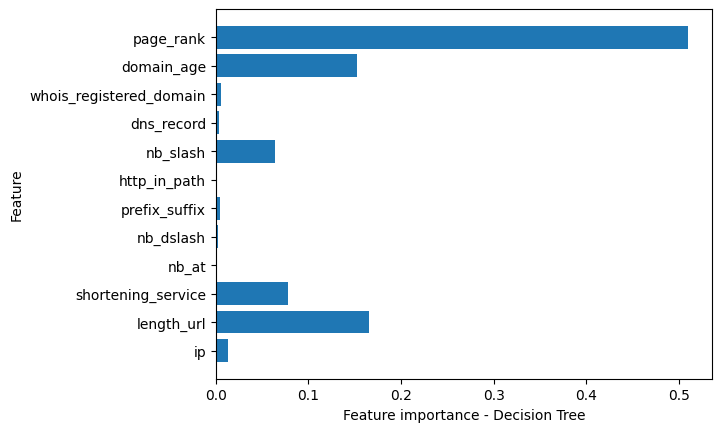

In [27]:
# Plotting the feature importance of the model

plt.barh(range(X_train.shape[1]), tree.feature_importances_, align='center')
plt.yticks(np.arange(X_train.shape[1]), X_train.columns)
plt.xlabel("Feature importance - Decision Tree")
plt.ylabel("Feature")
plt.show()

### Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth = 10)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [29]:

y_pred = rf_model.predict(X_test_scaled)
y_pred_train = rf_model.predict(X_train_scaled)

In [30]:
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)
report = classification_report(y_test, y_pred)

models_result['Random Forest'] = [accuracy_train, accuracy_test]

print("Random Forest Metrics:")
print("Accuracy on training Data: {:.3f}".format(accuracy_train))
print("Accuracy on test Data: {:.3f}".format(accuracy_test))
print("Classification Report:\n", report)

Random Forest Metrics:
Accuracy on training Data: 0.915
Accuracy on test Data: 0.910
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      1157
           1       0.94      0.88      0.91      1129

    accuracy                           0.91      2286
   macro avg       0.91      0.91      0.91      2286
weighted avg       0.91      0.91      0.91      2286



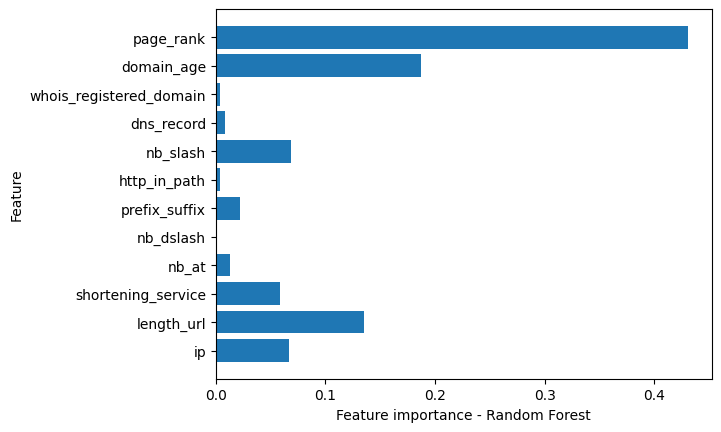

In [31]:
plt.barh(range(X_train.shape[1]), rf_model.feature_importances_, align='center')
plt.yticks(np.arange(X_train.shape[1]), X_train.columns)
plt.xlabel("Feature importance - Random Forest")
plt.ylabel("Feature")
plt.show()

###### We can see the random forest is able to perform slightly better by getting the most out of all the features.

### XGBoost

In [32]:
pip install xgboost

In [33]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:41:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [34]:

y_pred = xgb_model.predict(X_test_scaled)
y_pred_train = xgb_model.predict(X_train_scaled)

In [35]:
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)
report = classification_report(y_test, y_pred)


models_result['XGBoost'] = [accuracy_train, accuracy_test]

print("XGBoost Metrics:")
print("Accuracy on training Data: {:.3f}".format(accuracy_train))
print("Accuracy on test Data: {:.3f}".format(accuracy_test))
print("Classification Report:\n", report)

XGBoost Metrics:
Accuracy on training Data: 0.951
Accuracy on test Data: 0.923
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92      1157
           1       0.93      0.92      0.92      1129

    accuracy                           0.92      2286
   macro avg       0.92      0.92      0.92      2286
weighted avg       0.92      0.92      0.92      2286



### Support Vector Machine

In [36]:
from sklearn.svm import SVC

# Training an SVM Classifier
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [37]:

y_pred = svm_model.predict(X_test_scaled)
y_pred_train = svm_model.predict(X_train_scaled)

In [38]:
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)
report = classification_report(y_test, y_pred)

models_result['SVM'] = [accuracy_train, accuracy_test]

print("SVM Metrics:")
print("Accuracy on training Data: {:.3f}".format(accuracy_train))
print("Accuracy on test Data: {:.3f}".format(accuracy_test))
print("Classification Report:\n", report)

SVM Metrics:
Accuracy on training Data: 0.814
Accuracy on test Data: 0.822
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83      1157
           1       0.85      0.77      0.81      1129

    accuracy                           0.82      2286
   macro avg       0.83      0.82      0.82      2286
weighted avg       0.83      0.82      0.82      2286



### Multilayer Perceptron

In [39]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(64, 32, 16),
                         activation='relu',
                         solver='adam',
                         max_iter=200,
                         batch_size=128,
                         random_state=42,
                         early_stopping=True,
                         validation_fraction=0.1)
mlp.fit(X_train_scaled, y_train)

MLPClassifier(batch_size=128, early_stopping=True,
              hidden_layer_sizes=(64, 32, 16), random_state=42)

In [40]:

y_pred = mlp.predict(X_test_scaled)
y_pred_train = mlp.predict(X_train_scaled)

In [41]:
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)
report = classification_report(y_test, y_pred)

models_result['Multilayer Perceptron'] = [accuracy_train, accuracy_test]

print("Multilayer Perceptron Metrics:")
print("Accuracy on training Data: {:.3f}".format(accuracy_train))
print("Accuracy on test Data: {:.3f}".format(accuracy_test))
print("Classification Report:\n", report)

Multilayer Perceptron Metrics:
Accuracy on training Data: 0.886
Accuracy on test Data: 0.892
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1157
           1       0.93      0.85      0.89      1129

    accuracy                           0.89      2286
   macro avg       0.90      0.89      0.89      2286
weighted avg       0.90      0.89      0.89      2286



In [42]:
print(f"{'Model':<30}{'Training Accuracy':<20}{'Test Accuracy':<15}")
print("-" * 55)


for model, metrics in models_result.items():
    print(f"{model:<30}{metrics[0]:<20.3f}{metrics[1]:<15.3f}")


Model                         Training Accuracy   Test Accuracy  
-------------------------------------------------------
Logistic Regression           0.815               0.820          
Decision Tree                 0.923               0.893          
Random Forest                 0.915               0.910          
XGBoost                       0.951               0.923          
SVM                           0.814               0.822          
Multilayer Perceptron         0.886               0.892          
